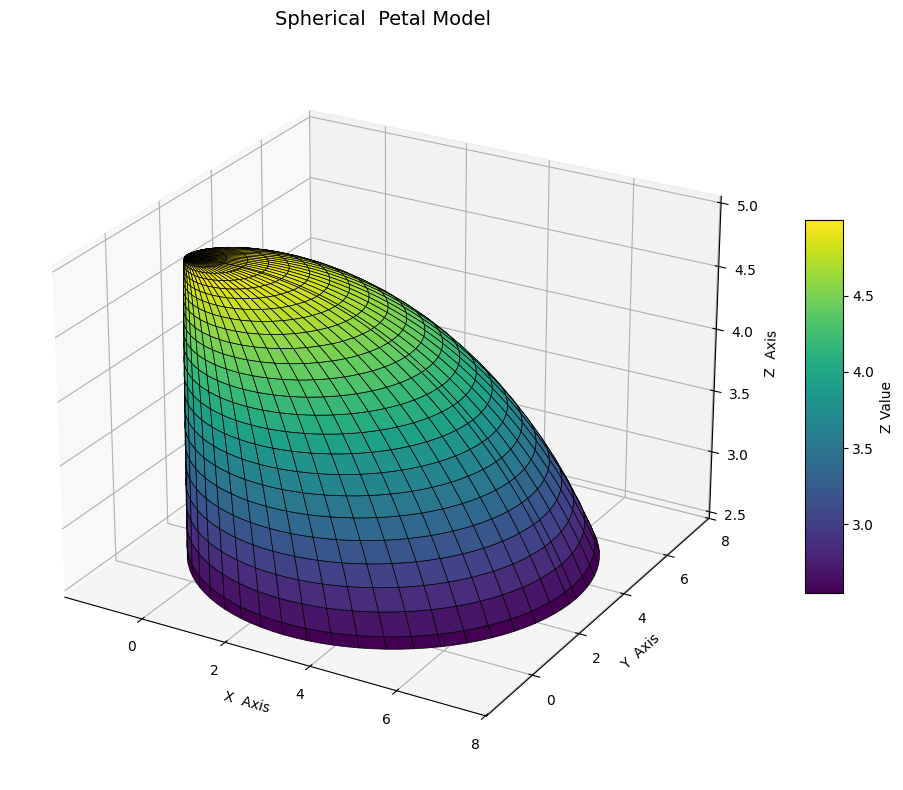

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ========== 参数设置 ==========
R = 5  # 球面半径
theta_num = 100  # 方位角θ采样点数
phi_num = 50  # 极角φ采样点数
phi_min = 0  # 极角下限（控制Z轴起始高度）
phi_max = np.pi / 3  # 极角上限（控制Z轴终止高度）

# ========== 生成参数网格 ==========
theta = np.linspace(0, 2 * np.pi, theta_num)  # 方位角θ范围[0,2π]
phi = np.linspace(phi_min, phi_max, phi_num)  # 极角φ范围[0,π/3]
theta, phi = np.meshgrid(theta, phi)  # 生成网格坐标

# ========== 参数方程 ==========
# 历史对话中的推导方程[6]()
x = R * (np.cos(theta) + np.cos(np.pi / 4)) * np.sin(phi)
y = R * (np.sin(theta) + np.sin(np.pi / 4)) * np.sin(phi)
z = R * np.cos(phi)  # Z轴圆弧轨迹方程[2]()

# ========== 3D绘图 ==========
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# 绘制曲面（花瓣颜色随Z轴渐变）
surf = ax.plot_surface(
    x,
    y,
    z,
    cmap="viridis",  # 颜色映射
    edgecolor="k",  # 网格线颜色
    linewidth=0.5,  # 网格线宽
    rstride=2,  # 径向采样间隔
    cstride=2,
)  # 环向采样间隔

# ========== 图形美化 ==========
ax.set_xlabel("X  Axis")
ax.set_ylabel("Y  Axis")
ax.set_zlabel("Z  Axis")
ax.set_title("Spherical  Petal Model", fontsize=14)
ax.view_init(elev=25, azim=-60)  # 设置视角[2]()

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=10, label="Z Value")

plt.tight_layout()
plt.show()

In [20]:
import numpy as np
import plotly.graph_objects as go

# ========== 参数设置 ==========
R = 5  # 球面半径
theta_num = 200  # 方位角θ采样点数
phi_num = 100  # 极角φ采样点数
phi_min = 0  # 极角下限（控制Z轴起始高度）
phi_max = np.pi / 3  # 极角上限（控制Z轴结束高度）

# ========== 生成参数网格 ==========
theta = np.linspace(0, 2 * np.pi, theta_num)  # 方位角θ范围0-2π
phi = np.linspace(phi_min, phi_max, phi_num)  # 极角φ范围
Theta, Phi = np.meshgrid(theta, phi)  # 生成网格坐标

# ========== 参数方程计算 ==========
# 球面参数方程（叠加花瓣形状）
X = R * np.sin(Phi) * (np.cos(Theta) + np.cos(np.pi / 4))
Y = R * np.sin(Phi) * (np.sin(Theta) - np.sin(np.pi / 4))  # 使用减号形成非对称花瓣
Z = R * np.cos(Phi)  # Z轴为球面极角控制的圆弧

# ========== 3D曲面绘制 ==========
fig = go.Figure(
    data=[
        go.Surface(
            x=X,
            y=Y,
            z=Z,
            surfacecolor=Phi,  # 用极角φ值映射颜色
            colorscale="Viridis",  # 选择颜色映射方案
            opacity=0.8,
            contours_z=dict(show=True, project_z=True),  # 显示Z轴等高线
        )
    ]
)

# ========== 布局设置 ==========
fig.update_layout(
    title="3D花瓣曲面（球面参数方程）",
    scene=dict(
        xaxis_title="X轴",
        yaxis_title="Y轴",
        zaxis_title="Z轴",
        camera=dict(eye=dict(x=1.8, y=1.8, z=0.8)),  # 设置初始视角
        bgcolor="rgb(20,20,20)",  # 深色背景增强对比度
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

fig.show()

In [21]:
import plotly.graph_objects as go
import numpy as np

# Parameters
R = 2  # Radius of the large sphere on which the centers lie
r = 3  # Radius of the three small spheres

# Centers of the three small spheres
centers = [(R, 0, 0), (-R / 2, R * np.sqrt(3) / 2, 0), (-R / 2, -R * np.sqrt(3) / 2, 0)]

# Create a grid
x, y, z = np.mgrid[-4:4:40j, -4:4:40j, -4:4:40j]

# Define the three spheres
sphere1 = (x - centers[0][0]) ** 2 + (y - centers[0][1]) ** 2 + z**2 - r**2
sphere2 = (x - centers[1][0]) ** 2 + (y - centers[1][1]) ** 2 + z**2 - r**2
sphere3 = (x - centers[2][0]) ** 2 + (y - centers[2][1]) ** 2 + z**2 - r**2

# Create the intersection (where all three spheres are <= 0)
intersection = np.maximum(np.maximum(sphere1, sphere2), sphere3)

# Create the figure
fig = go.Figure(
    data=go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=intersection.flatten(),
        isomin=0,
        isomax=0,
        caps=dict(x_show=False, y_show=False, z_show=False),
        surface_count=1,
        colorscale="Blues",
        opacity=0.6,
    )
)

# Add the centers for reference
for center in centers:
    fig.add_trace(
        go.Scatter3d(
            x=[center[0]],
            y=[center[1]],
            z=[center[2]],
            mode="markers",
            marker=dict(size=5, color="red"),
            name=f"Center at {center}",
        )
    )

# Update layout
fig.update_layout(
    title="Intersection of Three Spheres",
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z", aspectmode="data"),
    width=800,
    height=800,
)

fig.show()

In [22]:
import plotly.graph_objects as go
import numpy as np

# Parameters
R = 2  # Radius of the large sphere on which the centers lie
r = 3  # Radius of the four small spheres

# Centers of the four small spheres
centers = [(R, 0, 0), (0, R, 0), (-R, 0, 0), (0, -R, 0)]

# Create a grid
x, y, z = np.mgrid[-4:4:40j, -4:4:40j, -4:4:40j]

# Define the four spheres
sphere1 = (x - centers[0][0]) ** 2 + (y - centers[0][1]) ** 2 + z**2 - r**2
sphere2 = (x - centers[1][0]) ** 2 + (y - centers[1][1]) ** 2 + z**2 - r**2
sphere3 = (x - centers[2][0]) ** 2 + (y - centers[2][1]) ** 2 + z**2 - r**2
sphere4 = (x - centers[3][0]) ** 2 + (y - centers[3][1]) ** 2 + z**2 - r**2

# Create the intersection (where all four spheres are <= 0)
intersection = np.maximum(np.maximum(np.maximum(sphere1, sphere2), sphere3), sphere4)

# Create the figure
fig = go.Figure(
    data=go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=intersection.flatten(),
        isomin=0,
        isomax=0,
        caps=dict(x_show=False, y_show=False, z_show=False),
        surface_count=1,
        colorscale="Blues",
        opacity=0.6,
    )
)

# Add the centers for reference
for center in centers:
    fig.add_trace(
        go.Scatter3d(
            x=[center[0]],
            y=[center[1]],
            z=[center[2]],
            mode="markers",
            marker=dict(size=5, color="red"),
            name=f"Center at {center}",
        )
    )

# Update layout
fig.update_layout(
    title="Intersection of Four Spheres",
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z", aspectmode="data"),
    width=800,
    height=800,
)

fig.show()

In [23]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 1  # 球半径
theta = np.linspace(0, np.pi, 50)  # 极角 θ ∈ [0, π]（上下半球）
phi = np.linspace(np.pi/8, 3*np.pi / 8, 50)  # 方位角 φ ∈ [0, π/4]

# 生成网格
theta_grid, phi_grid = np.meshgrid(theta, phi)

# 转换为直角坐标系
x = R * np.sin(theta_grid) * np.cos(phi_grid)
y = R * np.sin(theta_grid) * np.sin(phi_grid)
z = R * np.cos(theta_grid)-R

# 绘制曲面
fig = go.Figure(
    data=[go.Surface(x=x, y=y, z=z, colorscale="Blues", opacity=0.8, showscale=False)]
)

# 添加辅助平面（显示 φ=0 和 φ=π/4 的边界）
phi_boundary = np.pi / 4
x_bound0 = R * np.sin(theta) * np.cos(0)  # φ=0 边界
y_bound0 = R * np.sin(theta) * np.sin(0)
z_bound0 = R * np.cos(theta)-R
x_bound1 = R * np.sin(theta) * np.cos(phi_boundary)  # φ=π/4 边界
y_bound1 = R * np.sin(theta) * np.sin(phi_boundary)

fig.add_trace(
    go.Scatter3d(
        x=x_bound0,
        y=y_bound0,
        z=z_bound0,
        mode="lines",
        line=dict(color="red", width=5),
        name="φ=0",
    )
)
fig.add_trace(
    go.Scatter3d(
        x=x_bound1,
        y=y_bound1,
        z=z_bound0,
        mode="lines",
        line=dict(color="green", width=5),
        name="φ=π/4",
    )
)

# 设置布局
fig.update_layout(
    title="球面坐标系中 φ ∈ [0, π/4] 的曲面",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z",
        aspectmode="cube",
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),  # 调整视角
    ),
    width=700,
    height=700,
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 1  # 球半径
alpha = np.arccos(np.sqrt(3 + 8 * np.sqrt(2)) * (4 * np.sqrt(2) - 1) / 18)
theta = np.linspace(0, np.pi, 50)  # 极角 θ ∈ [0, π]（上下半球）
phi = np.linspace(-alpha, 0, 50)  # 方位角 φ ∈ [0, π/4]
(x0, y0, z0) = (0, np.sqrt(2) / 2, 0)  # 球心坐标
# 生成网格
theta_grid, phi_grid = np.meshgrid(theta, phi)

# 转换为直角坐标系
x = R * np.sin(theta_grid) * np.cos(phi_grid) + x0
y = R * np.sin(theta_grid) * np.sin(phi_grid) + y0
z = R * np.cos(theta_grid) + z0

# 绘制曲面
fig = go.Figure(
    data=[go.Surface(x=x, y=y, z=z, colorscale="Blues", opacity=0.8, showscale=False)]
)

# 添加辅助平面（显示 φ=0 和 φ=π/4 的边界）
phi_boundary = 0
x_bound0 = R * np.sin(theta) * np.cos(-alpha) + x0  # φ=0 边界
y_bound0 = R * np.sin(theta) * np.sin(-alpha) + y0
z_bound0 = R * np.cos(theta) + z0
x_bound1 = R * np.sin(theta) * np.cos(phi_boundary) + x0  # φ=π/4 边界
y_bound1 = R * np.sin(theta) * np.sin(phi_boundary) + y0
z_bound1 = R * np.cos(theta) + z0
fig.add_trace(
    go.Scatter3d(
        x=x_bound0,
        y=y_bound0,
        z=z_bound0,
        mode="lines",
        line=dict(color="red", width=5),
        name="φ=0",
    )
)
fig.add_trace(
    go.Scatter3d(
        x=x_bound1,
        y=y_bound1,
        z=z_bound1,
        mode="lines",
        line=dict(color="green", width=5),
        name="φ=π/4",
    )
)

# 设置布局
fig.update_layout(
    title="球面坐标系中 φ ∈ [0, π/4] 的曲面",
    scene=dict(
        xaxis=dict(range=[-R * 2, R * 2], nticks=5),  # 设置轴范围略大于半径
        yaxis=dict(range=[-R * 2, R * 2], nticks=5),
        zaxis=dict(range=[-R * 2, R * 2], nticks=5),
        aspectmode="manual",  # 手动设置比例
        aspectratio=dict(x=1, y=1, z=1),  # 1:1:1比例
    ),
    width=700,
    height=700,
)

fig.show()

In [24]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 2  # 球体半径
d = R  # 球心间距
transparency = 0.3

# 改进的球面参数化
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = R * np.outer(np.cos(u), np.sin(v))
y = R * np.outer(np.sin(u), np.sin(v))
z = R * np.outer(np.ones_like(u), np.cos(v))

# 创建球体
fig = go.Figure()
fig.add_trace(
    go.Surface(
        x=x,
        y=y,
        z=z,
        colorscale=[[0, "blue"], [1, "blue"]],
        opacity=transparency,
        showscale=False,
        name="球体1",
    )
)
fig.add_trace(
    go.Surface(
        x=x + d,
        y=y,
        z=z,
        colorscale=[[0, "red"], [1, "red"]],
        opacity=transparency,
        showscale=False,
        name="球体2",
    )
)

# 精确计算交线（三维空间中的圆）
theta = np.linspace(0, 2 * np.pi, 100)
# 交线所在平面：x = d/2
# 交线半径：sqrt(R^2 - (d/2)^2)
r_intersect = np.sqrt(R**2 - (d / 2) ** 2)
y_intersect = r_intersect * np.cos(theta)
z_intersect = r_intersect * np.sin(theta)
x_intersect = np.full_like(theta, d / 2)  # 所有x坐标为d/2

# 添加交线（完整圆环）
fig.add_trace(
    go.Scatter3d(
        x=x_intersect,
        y=y_intersect,
        z=z_intersect,
        mode="lines",
        line=dict(color="lime", width=5),
        name="交线",
    )
)

# 标记球心
fig.add_trace(
    go.Scatter3d(
        x=[0, d],
        y=[0, 0],
        z=[0, 0],
        mode="markers",
        marker=dict(size=6, color=["blue", "red"]),
        name="球心",
    )
)

# 设置布局（确保正球显示）
fig.update_layout(
    title="两个相交正球体（正确交线）",
    scene=dict(
        xaxis=dict(range=[-R, d + R], nticks=6),
        yaxis=dict(range=[-R, R], nticks=6),
        zaxis=dict(range=[-R, R], nticks=6),
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=700,
)

fig.show()

In [25]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 1.0  # 球体半径
transparency = 0.5  # 透明度(0-1)

# 生成球面网格点
theta = np.linspace(0, 2 * np.pi, 50)  # 方位角
phi = np.linspace(0, np.pi, 25)  # 极角
theta_grid, phi_grid = np.meshgrid(theta, phi)

# 转换为直角坐标
x = R * np.sin(phi_grid) * np.cos(theta_grid)
y = R * np.sin(phi_grid) * np.sin(theta_grid)
z = R * np.cos(phi_grid)

# 创建球体表面
sphere = go.Surface(
    x=x,
    y=y,
    z=z,
    colorscale=[[0, "blue"], [1, "blue"]],
    opacity=transparency,
    showscale=False,
)
# 转换为直角坐标
x1 = R * np.sin(phi_grid) * np.cos(theta_grid)
y1 = R * np.sin(phi_grid) * np.sin(theta_grid)
z1 = R * np.cos(phi_grid) - R

# 创建球体表面
sphere1 = go.Surface(
    x=x1,
    y=y1,
    z=z1,
    colorscale=[[0, "lime"], [1, "lime"]],
    opacity=transparency,
    showscale=False,
)

# 标记球心
center = go.Scatter3d(
    x=[0], y=[0], z=[0], mode="markers", marker=dict(size=5, color="red"), name="球心"
)
center1 = go.Scatter3d(
    x=[0],
    y=[0],
    z=[-1],
    mode="markers",
    marker=dict(size=5, color="green"),
    name="球心1",
)

# 创建图形
fig = go.Figure(data=[sphere, center, sphere1, center1])

# 关键设置：强制等比例显示
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-R * 2, R * 2], nticks=5),  # 设置轴范围略大于半径
        yaxis=dict(range=[-R * 2, R * 2], nticks=5),
        zaxis=dict(range=[-R * 2, R * 2], nticks=5),
        aspectmode="manual",  # 手动设置比例
        aspectratio=dict(x=1, y=1, z=1),  # 1:1:1比例
    ),
    width=700,
    height=600,
    title="透明正球体(完美比例)",
)

fig.show()

In [26]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 1.0  # 球体半径
n = 6
transparency = 0.3  # 透明度(0-1)

def n_points(N, R, theta_p=0):
    return [
        [
            R * np.cos(i * 2 * np.pi / N + np.pi / 2 + theta_p),
            R * np.sin(i * 2 * np.pi / N + np.pi / 2 + theta_p),
        ]
        for i in range(N)
    ]


a = n_points(n, 0.5)

# 生成球面网格点
theta = np.linspace(0, 2 * np.pi, 50)  # 方位角
phi = np.linspace(np.pi/2, np.pi, 25)  # 极角
theta_grid, phi_grid = np.meshgrid(theta, phi)

# 初始化列表
spheres = []  # 存储所有球体
centers = []  # 存储所有球心

for i in range(n):
    # 转换为直角坐标
    x = R * np.sin(phi_grid) * np.cos(theta_grid) + a[i][0]
    y = R * np.sin(phi_grid) * np.sin(theta_grid) + a[i][1]
    z = R * np.cos(phi_grid)

    # 创建球体表面
    sphere = go.Surface(
        x=x,
        y=y,
        z=z,
        colorscale=[[0, "lime"], [1, "lime"]],
        opacity=transparency,
        showscale=False,
    )
    spheres.append(sphere)

    # 标记球心
    center = go.Scatter3d(
        x=[a[i][0]],  # 需要传入列表
        y=[a[i][1]],  # 需要传入列表
        z=[0],
        mode="markers",
        marker=dict(size=5, color="red"),
        name=f"球心 {i+1}",  # 为每个球心添加编号
    )
    centers.append(center)

# 创建图形,合并所有数据
fig = go.Figure(data=spheres + centers)

# 关键设置：强制等比例显示
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-R * 2, R * 2], nticks=5),  # 设置轴范围略大于半径
        yaxis=dict(range=[-R * 2, R * 2], nticks=5),
        zaxis=dict(range=[-R * 2, R * 2], nticks=5),
        aspectmode="manual",  # 手动设置比例
        aspectratio=dict(x=1, y=1, z=1),  # 1:1:1比例
    ),
    width=800,
    height=600,
    title="透明正球体(完美比例)",
)

fig.show()


In [27]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 1.0  # 球体半径
n = 6
transparency = 0.3  # 透明度(0-1)

def n_points(N, R, theta_p=0):
    return [
        [
            R * np.cos(i * 2 * np.pi / N + np.pi / 2 + theta_p),
            R * np.sin(i * 2 * np.pi / N + np.pi / 2 + theta_p),
        ]
        for i in range(N)
    ]

# 调整球心位置，使半球体相交
a = n_points(n, 0.5)  # 0.5是球心到原点的距离

# 生成球面网格点
theta = np.linspace(0, 2 * np.pi, 50)  # 方位角
phi = np.linspace(np.pi/2, np.pi, 25)  # 极角，只取下半球
theta_grid, phi_grid = np.meshgrid(theta, phi)

# 初始化列表
spheres = []  # 存储所有球体
centers = []  # 存储所有球心

# 计算相交区域的半径（内接圆）
inner_radius = 0.8 * np.cos(np.pi/n)  # 近似值，可根据需要调整

for i in range(n):
    # 转换为直角坐标
    x = R * np.sin(phi_grid) * np.cos(theta_grid) + a[i][0]
    y = R * np.sin(phi_grid) * np.sin(theta_grid) + a[i][1]
    z = R * np.cos(phi_grid)
    
    # 计算到原点的距离（用于裁剪）
    r = np.sqrt((x-a[i][0])**2 + (y-a[i][1])**2)
    
    # 创建球体表面（只显示在内接圆内的部分）
    mask = r <= inner_radius
    sphere = go.Surface(
        x=x * mask,  # 使用掩码裁剪
        y=y * mask,
        z=z * mask,
        colorscale=[[0, "lime"], [1, "lime"]],
        opacity=transparency,
        showscale=False,
    )
    spheres.append(sphere)

    # 标记球心
    center = go.Scatter3d(
        x=[a[i][0]],
        y=[a[i][1]],
        z=[0],
        mode="markers",
        marker=dict(size=5, color="red"),
        name=f"球心 {i+1}",
    )
    centers.append(center)

# 添加内接圆轮廓
t = np.linspace(0, 2*np.pi, 100)
circle = go.Scatter3d(
    x=inner_radius * np.cos(t),
    y=inner_radius * np.sin(t),
    z=np.zeros_like(t),
    mode='lines',
    line=dict(color='red', width=2),
    name='相交区域边界'
)

# 创建图形,合并所有数据
fig = go.Figure(data=spheres + centers + [circle])

# 布局设置
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-R * 2, R * 2], nticks=5),
        yaxis=dict(range=[-R * 2, R * 2], nticks=5),
        zaxis=dict(range=[-R * 2, R * 2], nticks=5),
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=1),
    ),
    width=800,
    height=600,
    title="半球体相交公共区域",
)

fig.show()

In [28]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 1.0  # 球体半径
n = 12  # 半球体数量
transparency = 0.4  # 透明度


def n_points(N, R, theta_p=0):
    """生成正多边形顶点坐标"""
    return [
        [
            R * np.cos(i * 2 * np.pi / N + np.pi / 2 + theta_p),
            R * np.sin(i * 2 * np.pi / N + np.pi / 2 + theta_p),
        ]
        for i in range(N)
    ]


# 计算球心位置
centers = n_points(n, 0.5)  # 0.5是球心到原点的距离

# 计算内接圆半径
inner_radius = 0.5 * np.cos(np.pi / n)

# 生成参数方程的角度网格
theta = np.linspace(0, 2 * np.pi, 50)  # 方位角
phi = np.linspace(np.pi / 2, np.pi, 25)  # 极角(下半球)
theta_grid, phi_grid = np.meshgrid(theta, phi)

# 初始化列表
spheres = []
centers_plot = []

for i in [0, 3, 6, 9]:
    # 计算球心
    center = centers[i]

    # 生成参数方程
    # 我们只生成在内接圆范围内的点
    theta_local = np.arctan2(y - center[1], x - center[0])
    r_local = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)

    # 使用参数方程直接生成半球体表面
    x = center[0] + R * np.sin(phi_grid) * np.cos(theta_grid)
    y = center[1] + R * np.sin(phi_grid) * np.sin(theta_grid)
    z = R * np.cos(phi_grid)

    # 创建半球体表面
    sphere = go.Surface(
        x=x,
        y=y,
        z=z,
        colorscale=[[0, "lime"], [1, "lime"]],
        opacity=transparency,
        showscale=False,
    )
    spheres.append(sphere)

    # 添加球心标记
    center_plot = go.Scatter3d(
        x=[center[0]],
        y=[center[1]],
        z=[0],
        mode="markers",
        marker=dict(size=5, color="red"),
        name=f"球心 {i+1}",
    )
    centers_plot.append(center_plot)

# 添加内接圆轮廓
t = np.linspace(0, 2 * np.pi, 100)
circle = go.Scatter3d(
    x=inner_radius * np.cos(t),
    y=inner_radius * np.sin(t),
    z=np.zeros_like(t),
    mode="lines",
    line=dict(color="red", width=2),
    name="相交区域边界",
)
center = go.Scatter3d(
    x=[0],
    y=[0],
    z=[0],
    mode="markers",
    marker=dict(size=5, color="blue"),
    name=f"球心",
)
# 创建图形
fig = go.Figure(data=spheres + centers_plot + [circle] + center)

# 设置布局
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-R * 2, R * 2], nticks=5),
        yaxis=dict(range=[-R * 2, R * 2], nticks=5),
        zaxis=dict(range=[-R * 2, R * 2], nticks=5),
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title="半球体相交区域(参数方程法)",
)

fig.show()

TypeError: can only concatenate list (not "Scatter3d") to list

In [ ]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 1.0  # 球体半径
n = 12  # 半球体数量
transparency = 0.4  # 透明度


def n_points(N, R, theta_p=0):
    """生成正多边形顶点坐标"""
    return [
        [
            R * np.cos(i * 2 * np.pi / N + np.pi / 2 + theta_p),
            R * np.sin(i * 2 * np.pi / N + np.pi / 2 + theta_p),
        ]
        for i in range(N)
    ]


# 计算球心位置
centers = n_points(n, 0.5)  # 0.5是球心到原点的距离

# 计算内接圆半径
inner_radius = 2 * np.cos(np.pi / n)

# 生成参数方程的角度网格
theta = np.linspace(0, 2 * np.pi, 50)  # 方位角
phi = np.linspace(np.pi / 2, np.pi, 25)  # 极角(下半球)
theta_grid, phi_grid = np.meshgrid(theta, phi)

# 初始化列表
spheres = []
centers_plot = []

for i in range(n):
    # 计算球心
    center = centers[i]

    # 使用参数方程直接生成半球体表面
    x = center[0] + R * np.sin(phi_grid) * np.cos(theta_grid)
    y = center[1] + R * np.sin(phi_grid) * np.sin(theta_grid)
    z = R * np.cos(phi_grid)

    # 计算到球心的距离（用于裁剪）
    r = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)

    # 只保留在内接圆范围内的部分
    mask = r <= inner_radius

    # 创建半球体表面
    sphere = go.Surface(
        x=x * mask,
        y=y * mask,
        z=z * mask,
        colorscale=[[0, "lime"], [1, "lime"]],
        opacity=transparency,
        showscale=False,
    )
    spheres.append(sphere)

    # 添加球心标记
    center_plot = go.Scatter3d(
        x=[center[0]],
        y=[center[1]],
        z=[0],
        mode="markers",
        marker=dict(size=5, color="red"),
        name=f"球心 {i+1}",
    )
    centers_plot.append(center_plot)

# 添加内接圆轮廓
t = np.linspace(0, 2 * np.pi, 100)
circle = go.Scatter3d(
    x=inner_radius * np.cos(t),
    y=inner_radius * np.sin(t),
    z=np.zeros_like(t),
    mode="lines",
    line=dict(color="red", width=2),
    name="相交区域边界",
)

# 添加中心点
center = go.Scatter3d(
    x=[0],
    y=[0],
    z=[0],
    mode="markers",
    marker=dict(size=5, color="blue"),
    name="中心点",
)

# 创建图形
fig = go.Figure(data=spheres + centers_plot + [circle, center])

# 设置布局
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-R * 2, R * 2], nticks=5),
        yaxis=dict(range=[-R * 2, R * 2], nticks=5),
        zaxis=dict(range=[-R * 2, R * 2], nticks=5),
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title="半球体相交区域(参数方程法)",
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# 参数设置
R = 1.0  # 球体半径
n = 12  # 半球体数量
transparency = 0.4  # 透明度


def n_points(N, R, theta_p=0):
    """生成正多边形顶点坐标"""
    return [
        [
            R * np.cos(i * 2 * np.pi / N + np.pi / 2 + theta_p),
            R * np.sin(i * 2 * np.pi / N + np.pi / 2 + theta_p),
        ]
        for i in range(N)
    ]


# 计算球心位置
centers = n_points(n, 0.5)  # 0.5是球心到原点的距离

# 计算内接圆半径
inner_radius = 2 * np.cos(np.pi / n)

# 生成参数方程的角度网格
theta = np.linspace(0, 2 * np.pi, 50)  # 方位角
phi = np.linspace(np.pi / 2, np.pi, 25)  # 极角(下半球)
theta_grid, phi_grid = np.meshgrid(theta, phi)

# 初始化列表
spheres = []
centers_plot = []
edges = []  # 存储边缘圆

for i in range(n):
    # 计算球心
    center = centers[i]

    # 使用参数方程直接生成半球体表面
    x = center[0] + R * np.sin(phi_grid) * np.cos(theta_grid)
    y = center[1] + R * np.sin(phi_grid) * np.sin(theta_grid)
    z = R * np.cos(phi_grid)

    # 计算到球心的距离（用于裁剪）
    r = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)

    # 只保留在内接圆范围内的部分
    mask = r <= inner_radius

    # 创建半球体表面
    sphere = go.Surface(
        x=x * mask,
        y=y * mask,
        z=z * mask,
        colorscale=[[0, "lime"], [1, "lime"]],
        opacity=transparency,
        showscale=False,
    )
    spheres.append(sphere)

    # 添加边缘圆
    t = np.linspace(0, 2 * np.pi, 100)
    edge_x = center[0] + R * np.cos(t)
    edge_y = center[1] + R * np.sin(t)
    edge_z = np.zeros_like(t)
    edge = go.Scatter3d(
        x=edge_x,
        y=edge_y,
        z=edge_z,
        mode="lines",
        line=dict(color="darkgreen", width=3),
        name=f"边缘 {i+1}",
    )
    edges.append(edge)

    # 添加球心标记
    center_plot = go.Scatter3d(
        x=[center[0]],
        y=[center[1]],
        z=[0],
        mode="markers",
        marker=dict(size=5, color="red"),
        name=f"球心 {i+1}",
    )
    centers_plot.append(center_plot)

# 添加内接圆轮廓
t = np.linspace(0, 2 * np.pi, 100)
circle = go.Scatter3d(
    x=inner_radius * np.cos(t),
    y=inner_radius * np.sin(t),
    z=np.zeros_like(t),
    mode="lines",
    line=dict(color="red", width=2),
    name="相交区域边界",
)

# 添加中心点
center = go.Scatter3d(
    x=[0],
    y=[0],
    z=[0],
    mode="markers",
    marker=dict(size=5, color="blue"),
    name="中心点",
)

# 创建图形
fig = go.Figure(data=spheres + edges + centers_plot + [circle, center])

# 设置布局
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-R * 2, R * 2], nticks=5),
        yaxis=dict(range=[-R * 2, R * 2], nticks=5),
        zaxis=dict(range=[-R * 2, R * 2], nticks=5),
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
    ),
    width=800,
    height=600,
    title="半球体相交区域(参数方程法)",
)

fig.show()